In [1]:
from sklearn.metrics import jaccard_score
from torch import no_grad, sigmoid, load, float32
from torchvision.ops.focal_loss import sigmoid_focal_loss
from torch.utils.data import DataLoader
from nix import NIX
from create_dataset import data
from srm import srm
from tqdm import tqdm
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_model(path, device):
    model = NIX(512, 512)
    model.load_state_dict(load(path, map_location=device))
    model = model.to(device)
    model.eval()
    return model


def val(data, model, device):
    running_loss = 0
    total_iou = 0
    with no_grad():
        for inputs, labels in tqdm(data):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs, srm(inputs, device))
            loss = sigmoid_focal_loss(outputs, labels, reduction='mean')

            running_loss += loss.item()

            # Calculate IoU
            pred = (sigmoid(outputs) > 0.5).int()
            labels = (sigmoid(labels) > 0.5).int()
            total_iou += jaccard_score(labels.flatten().cpu().numpy(), pred.flatten().cpu().numpy())

    val_loss = running_loss / len(data)
    iou = total_iou / len(data)

    print('Val Loss: %.3f | IoU: %.3f' % (val_loss, iou))
    return val_loss, iou

# Set device
device = "cpu"
if torch.backends.mps.is_available():
    device = "mps"
elif torch.cuda_is_available():
    device = "cuda"

device = torch.device(device)

In [3]:
PATH_TEST = "/Users/pauladler/MPDL_Project_2/data/test"
PATH_MODEL = "/Users/pauladler/MPDL_Project_2/nix_training1206.pth"

In [4]:
test_data = data(PATH_TEST)
test_dataloader = DataLoader(test_data, batch_size=1, num_workers=0, shuffle=False)

In [5]:
nix = load_model(PATH_MODEL, device)
val(test_dataloader, nix, device)

100%|██████████| 500/500 [01:01<00:00,  8.16it/s]

Val Loss: 0.124 | IoU: 0.114


(0.12381710833311081, 0.11438504791259765)

[[0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 ...
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]]
[[0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 ...
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]]
[[0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 

/var/folders/b7/qsrlm9px17bdtzfdds36lpt80000gn/T/ipykernel_71372/1526085917.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1, 3, figsize=(20, 20))


[[0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 ...
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]]
[[0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 ...
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]]
[[0.01141875 0.01141875 0.01141875 ... 0.01141875 0.01141875 0.01141875]
 [0.01141875 0.01141875 0.01141875 ... 

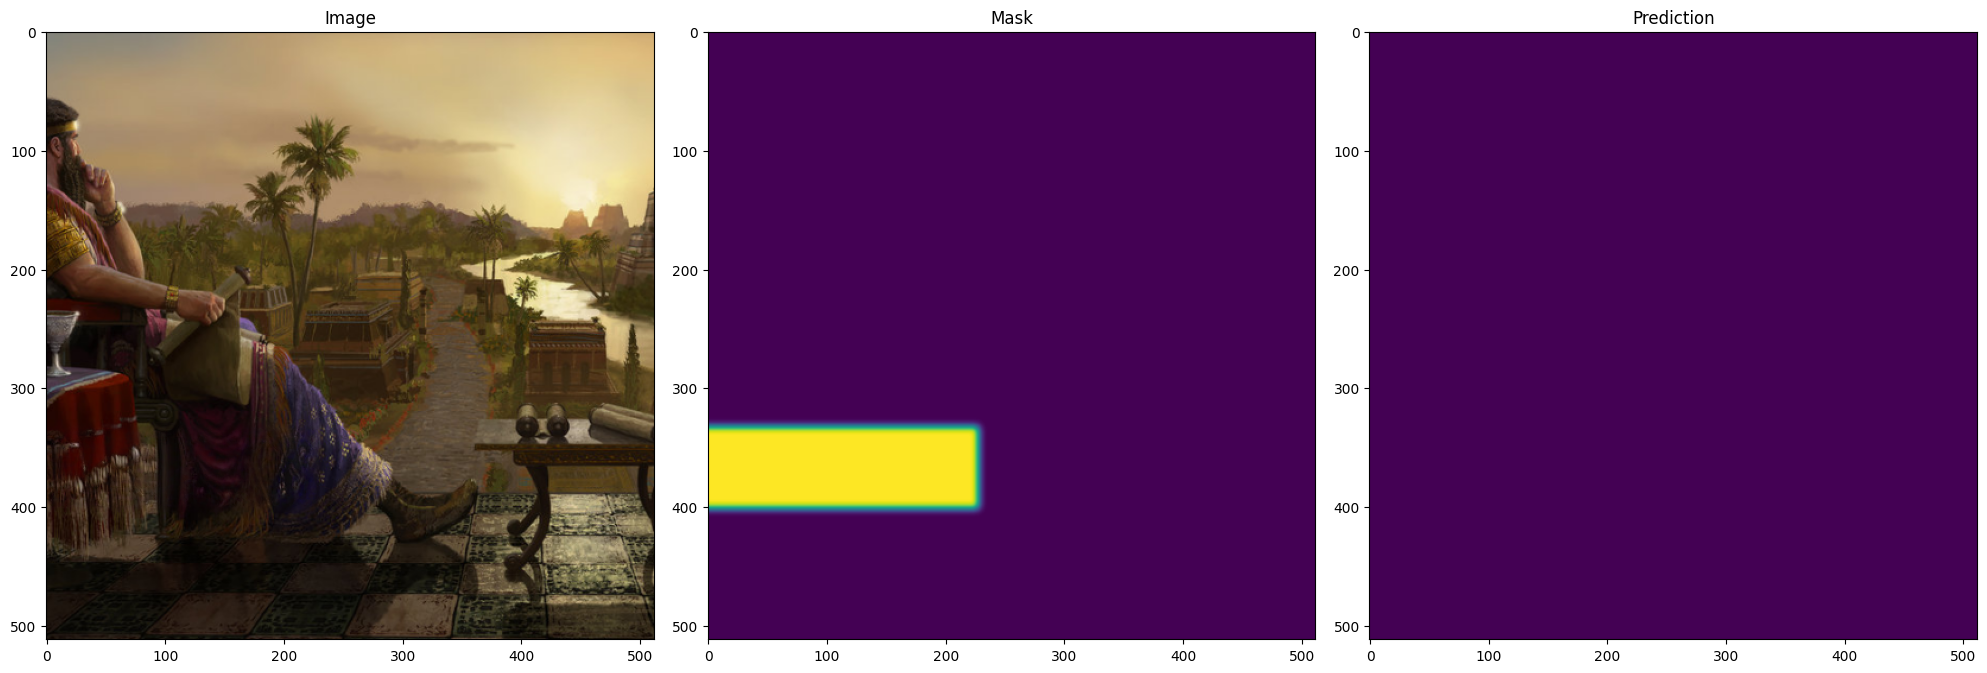

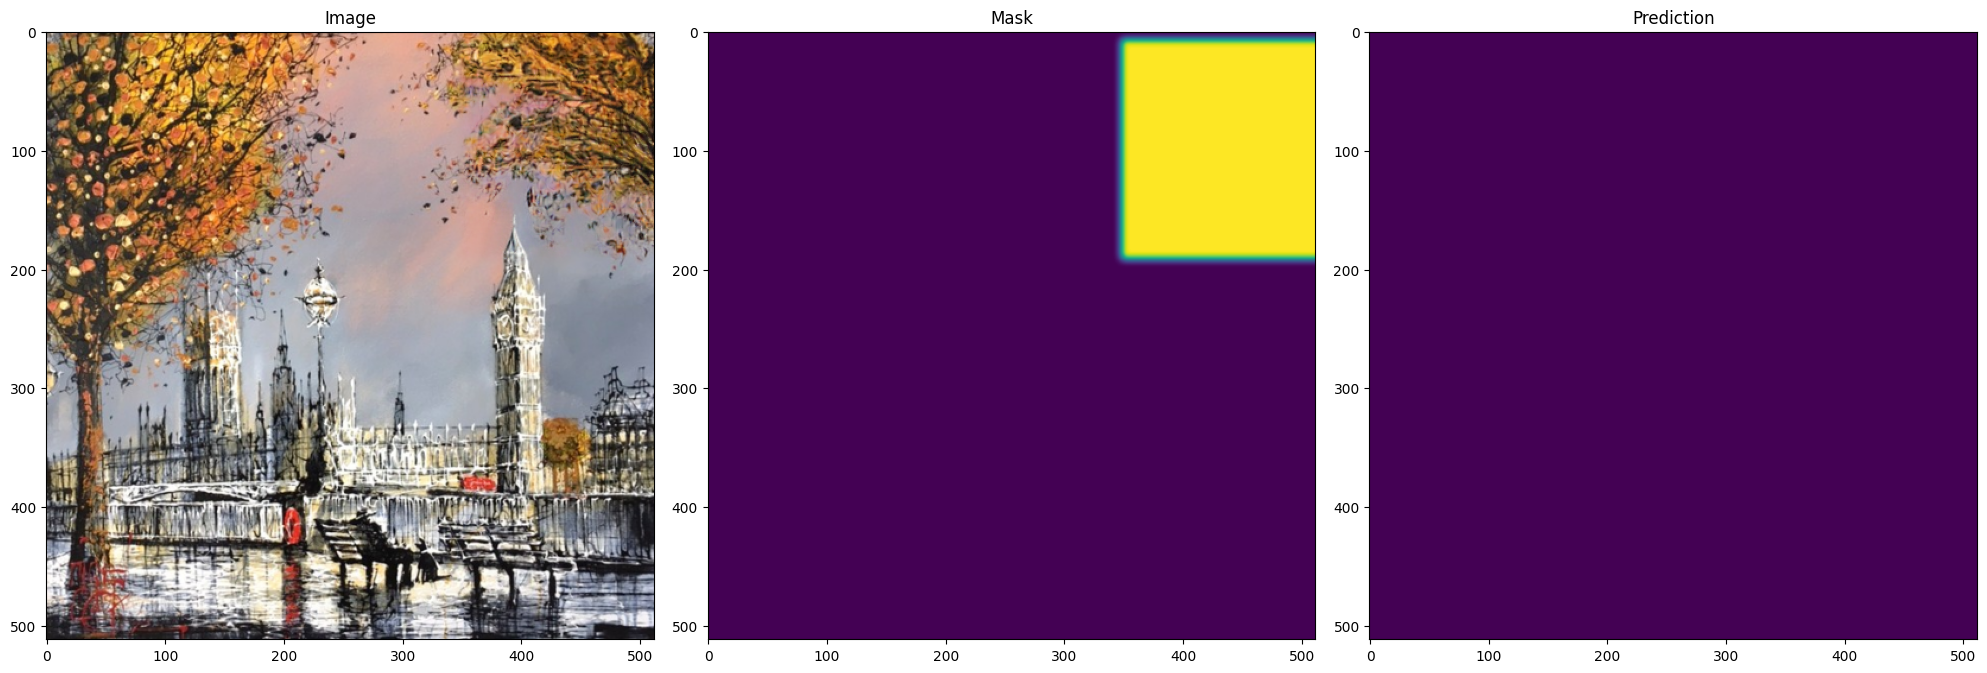

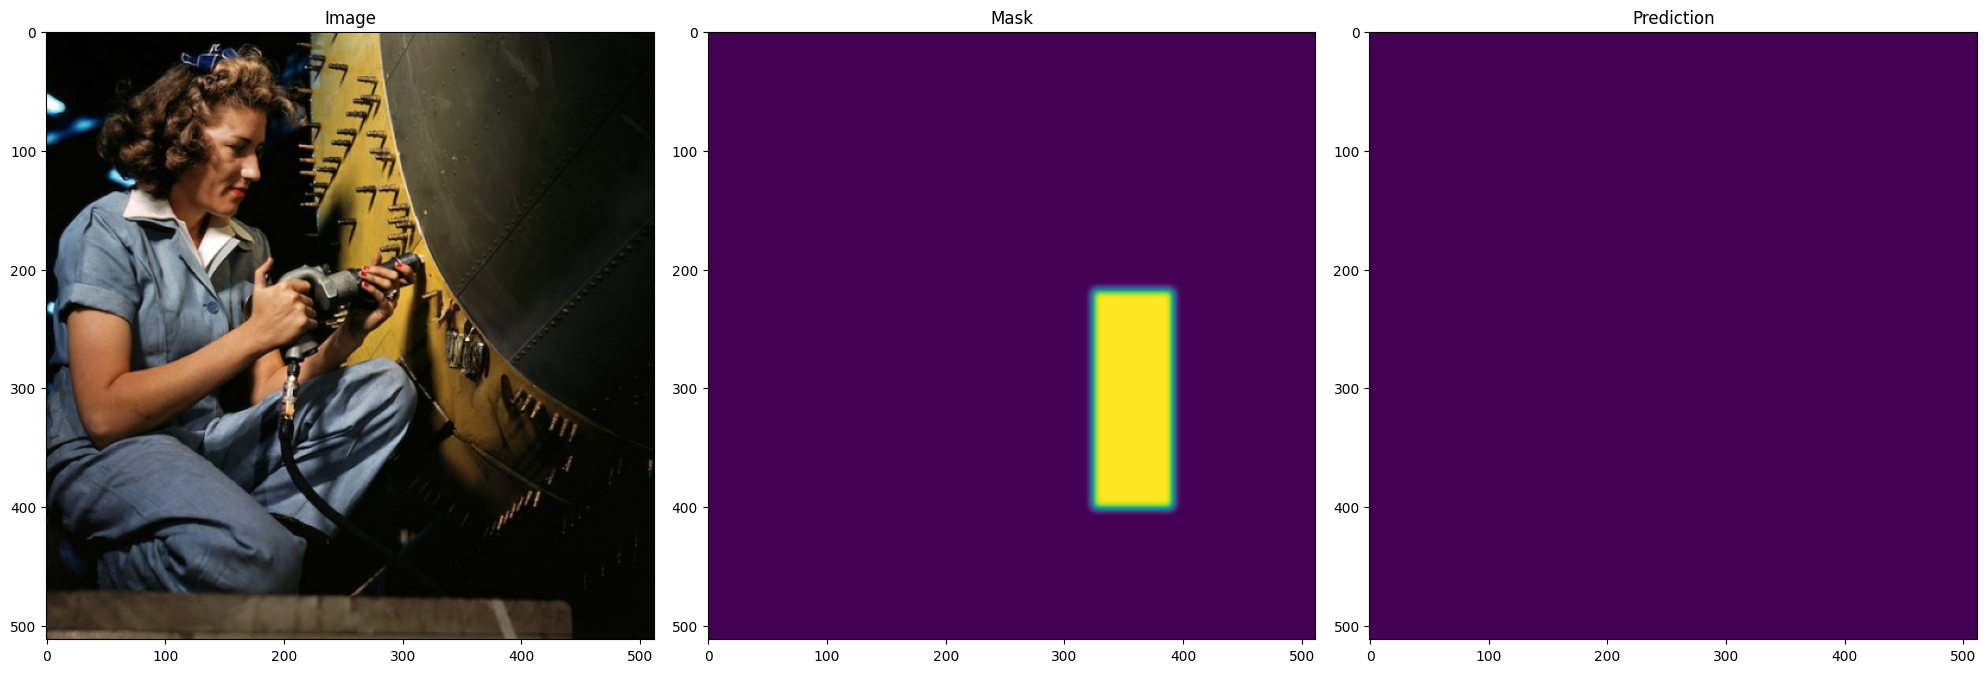

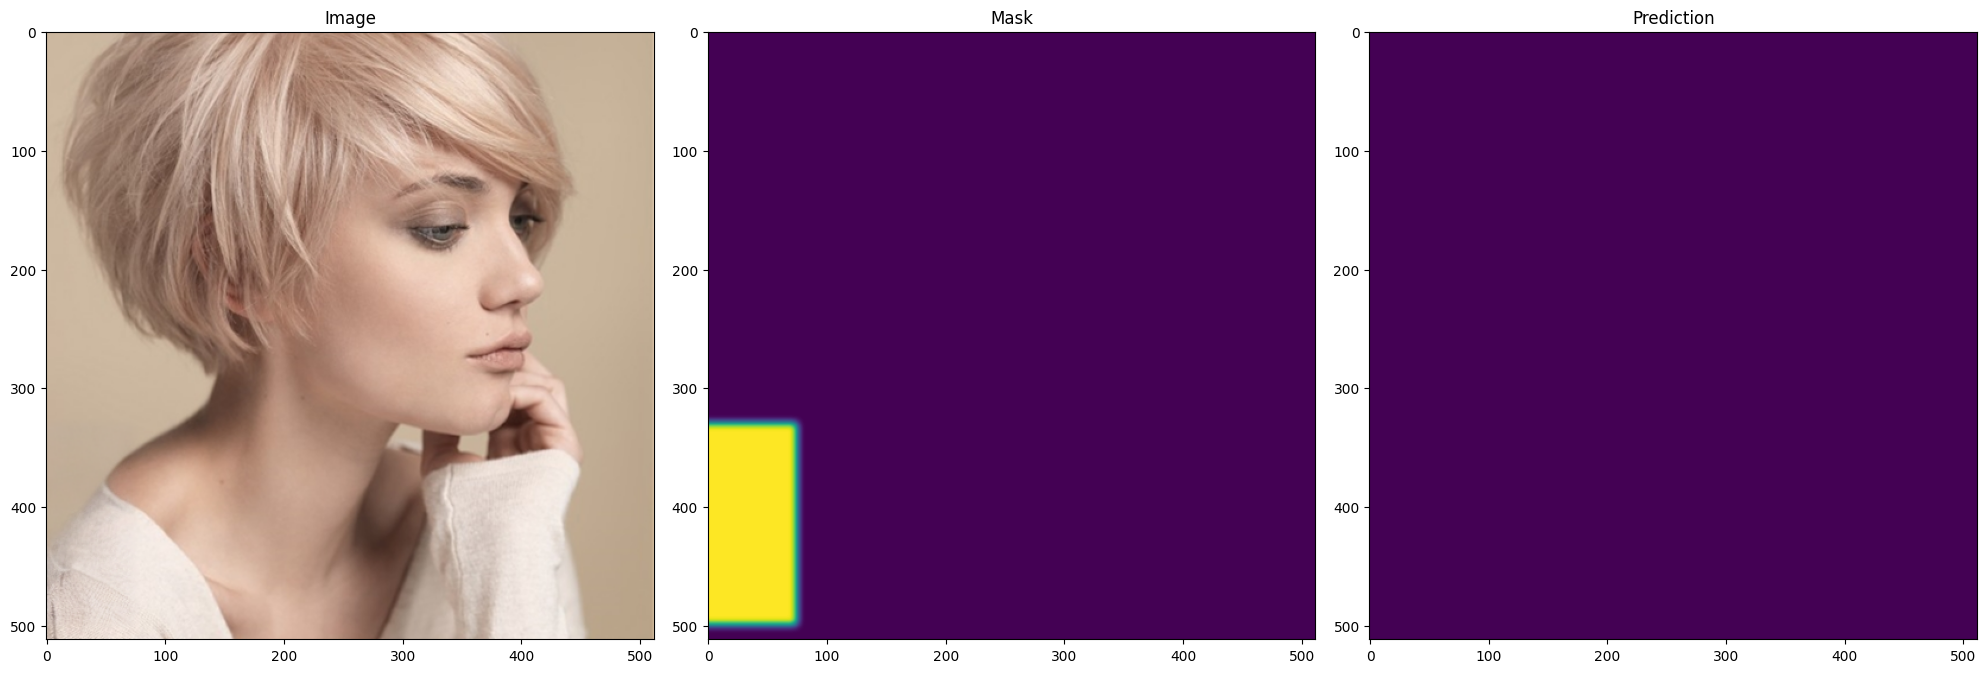

Error in callback <function flush_figures at 0x29786b160> (for post_execute):


KeyboardInterrupt: 

In [6]:
test_dataloader = DataLoader(test_data, batch_size=1, num_workers=0, shuffle=True)

for i in range(0, 25):
    x, y = next(iter(test_dataloader))
    x, y = x.to(device, dtype=float32), y.to(device, dtype=float32)
    with no_grad():
        pred = nix(x, srm(x, device))

    x = np.squeeze(x.detach().cpu().numpy())
    x = np.reshape(x, (512, 512, 3))

    y = np.squeeze(y.detach().cpu().numpy())

    pred = np.squeeze(pred.detach().cpu().numpy())
    print(pred)
    fig, axes = plt.subplots(1, 3, figsize=(20, 20))
    axes[0].imshow(x)
    axes[0].set_title('Image')
    axes[1].imshow(y)
    axes[1].set_title('Mask')
    axes[2].imshow(pred)
    axes[2].set_title('Prediction')
    fig.tight_layout()